In [1]:
from specim.specfuncs import spec1d
from keckcode.deimos import deimosmask1d
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
file_loc = '../galaxy_spectra/LRIS_red_data_20201120/keck_lris_red_B/Science/*'

In [5]:
file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'spec1d' in p and 'B0631' in p:
        if '.fits' in p:
            file_list.append(p)
        #frame = p.split('_')[-3][:4]
        #out_file.append('B0631_r'+ frame + '_skysub.fits')

In [6]:
file_list

['../galaxy_spectra/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0041-B0631+519_LRISr_2020Nov21T132253.443.fits',
 '../galaxy_spectra/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0040-B0631+519_LRISr_2020Nov21T121539.859.fits',
 '../galaxy_spectra/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0042-B0631+519_LRISr_2020Nov21T143637.210.fits']

In [7]:
for i, p in enumerate(file_list):
    if i==0:
        spec = deimosmask1d.DeimosMask1d(p)
        info = spec.slitinfo
        print(info)
    else:
        spec1 = deimosmask1d.DeimosMask1d(p)
        info = spec1.slitinfo
        print(info)
    if i!=0:
        spec = spec.coadd(spec1)
        info = spec.slitinfo
        print(info)

Reading 3 spectra from:
  ../galaxy_spectra/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0041-B0631+519_LRISr_2020Nov21T132253.443.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    291     1     110 10.68103577144262
  2    291     2     311 7.060695556245816
  2    291     3     574 2.640217985855404
Reading 3 spectra from:
  ../galaxy_spectra/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0040-B0631+519_LRISr_2020Nov21T121539.859.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    291     1     110 10.49610880096453
  2    291     2     311 6.933754894596607
  2    291     3     574 4.107059799956034

Extracted spectra in exposure 1: 3
Extracted spectra in exposure 2: 3

Number of matched spectra in all 2 exposures: 3
Reading 3 spectra from input table and spectrum dictionary
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------

In [9]:
specid = [] #np.zeros(coadded_spectra.nspec)
info = spec.slitinfo
#print(info)
for i in range(spec.nspec):
    spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
    specid.append(spec_id)
    print(spec_id)

2_291_1_110
2_291_2_311
2_291_3_574


spec_id : 2_291_1_110


<IPython.core.display.Javascript object>


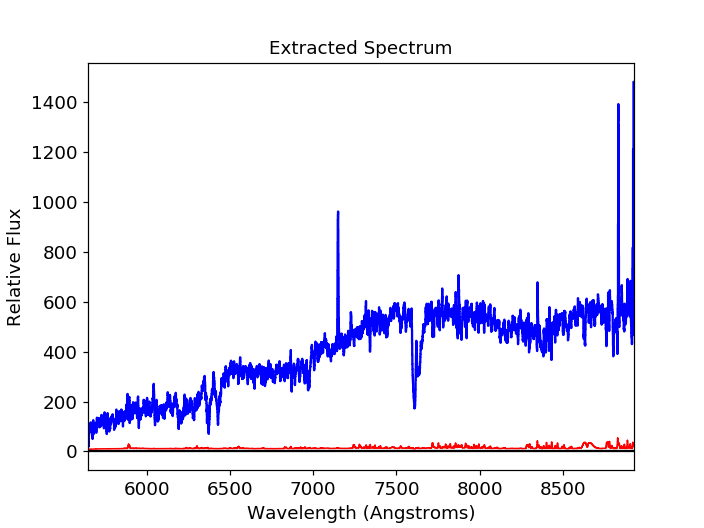

spec_id : 2_291_2_311


<IPython.core.display.Javascript object>


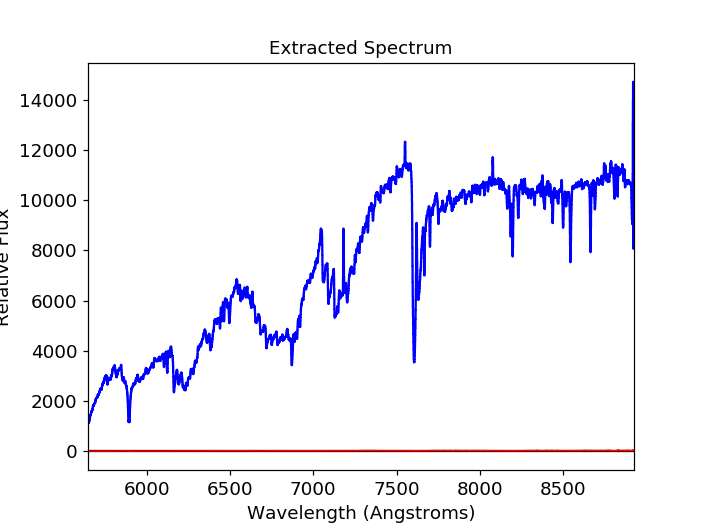

spec_id : 2_291_3_574


<IPython.core.display.Javascript object>


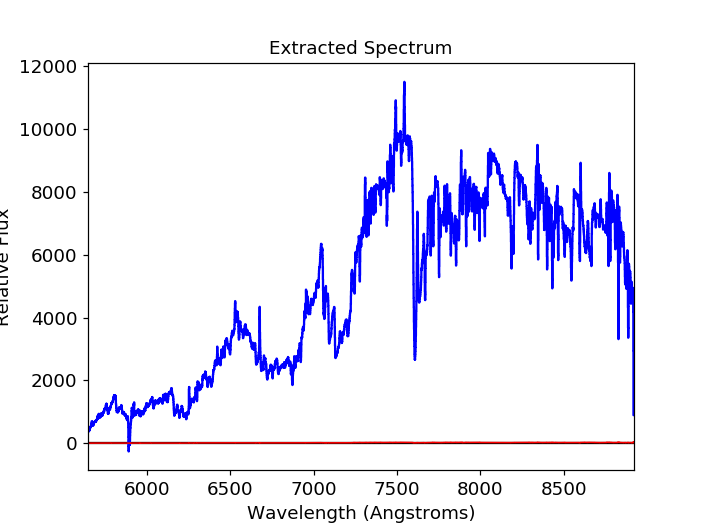

In [13]:
%matplotlib notebook

for i in range(len(specid)):
    print('spec_id : %s' %specid[i])
    spec[specid[i]].smooth(5)

<IPython.core.display.Javascript object>


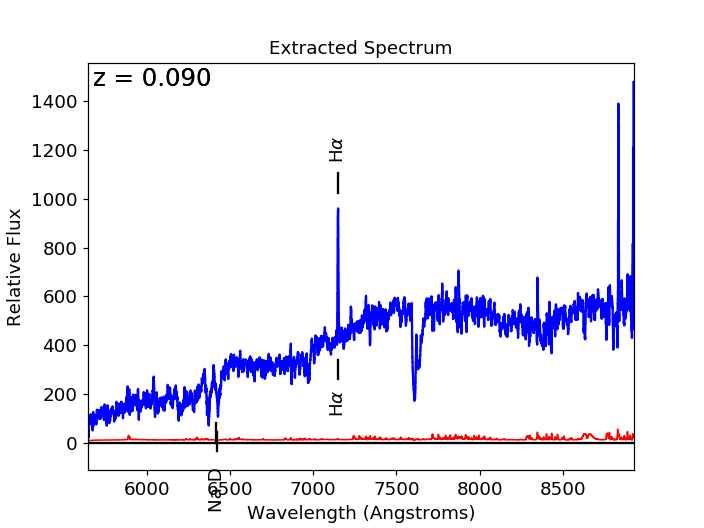


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Na I (D)      5889.95       6417.69
Na I (D)      5895.92       6424.19
H-alpha       6562.80       7150.83


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-alpha       6562.80       7150.83



In [20]:
spec[specid[0]].smooth(5)
spec[specid[0]].mark_lines('abs', z= 0.0896, usesmooth='True')
spec[specid[0]].mark_lines('strongem', z= 0.0896, usesmooth='True')

<IPython.core.display.Javascript object>


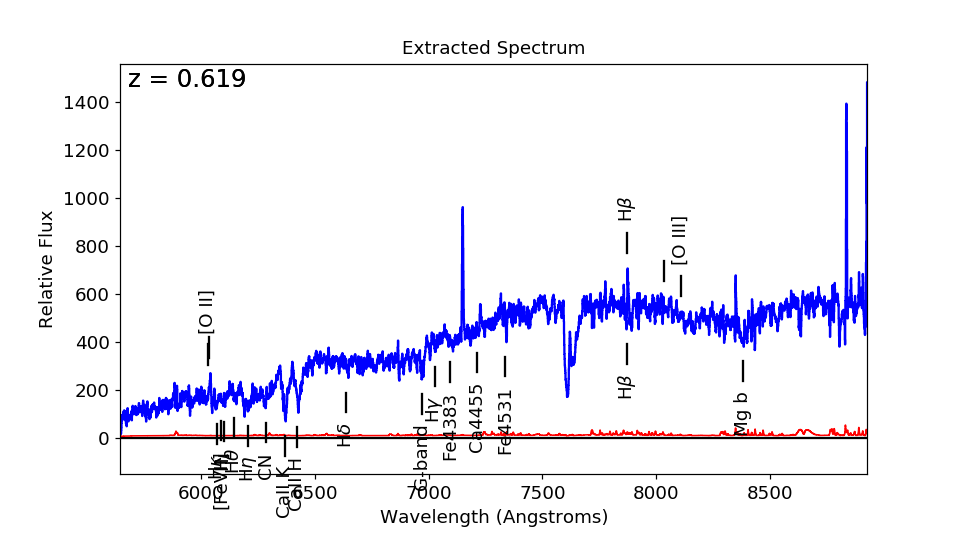


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6071.25
[Fe VII]      3761.40       6089.71
H-iota        3770.00       6103.63
H-theta       3797.00       6147.34
H-eta         3835.00       6208.86
CN bandhd     3883.00       6286.58
CaII K        3933.67       6368.61
CaII H        3968.47       6424.95
H-delta       4101.00       6639.52
G-band        4305.00       6969.80
H-gamma       4340.00       7026.46
Fe4383        4383.00       7096.08
Ca4455        4455.00       7212.64
Fe4531        4531.00       7335.69
H-beta        4861.00       7869.96
Mg I (b)      5176.00       8379.94


Line        lambda_rest  lambda_obs
----------  -----------  -----------
[O II]        3726.03       6032.44
[O II]        3728.82       6036.96
H-beta        4861.00       7869.96
[O III]       4962.00       8033.48
[O III]       5007.00       8106.33



In [21]:
spec[specid[0]].smooth(5)
spec[specid[0]].mark_lines('abs', z= 0.619, usesmooth='True')
spec[specid[0]].mark_lines('strongem', z= 0.619, usesmooth='True')